In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Display information about the graphics card (GPU) available in the workspace.

In [2]:
!nvidia-smi

Sun Feb  9 13:39:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# define a variable named HOME

In [3]:
import os
HOME = '/content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11'
os.chdir(HOME)
print(HOME)



/content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11


# Installing libraries and packages

In [4]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

# from google.colab import auth
# auth.authenticate_user()


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


# Fine-tune YOLO11 on custom dataset

In [5]:
!mkdir {HOME}/tardigrades.v1i.yolov11
%cd {HOME}/tardigrades.v1i.yolov11

# from google.colab import userdata
# from roboflow import Roboflow

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# workspace = rf.workspace("ks-fsm9o")
# project = workspace.project("pelvis-ap-x-ray")
# version = project.version(3)
# dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11’: File exists
/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11


# Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={HOME}/tardigrades.v1i.yolov11/data.yaml epochs=3

!ls {HOME}/runs/segment/train/

/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2025/02_Assignment_Submission/Anna_Shilling/11
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, sav

# Statistical test whether the model is really correct:

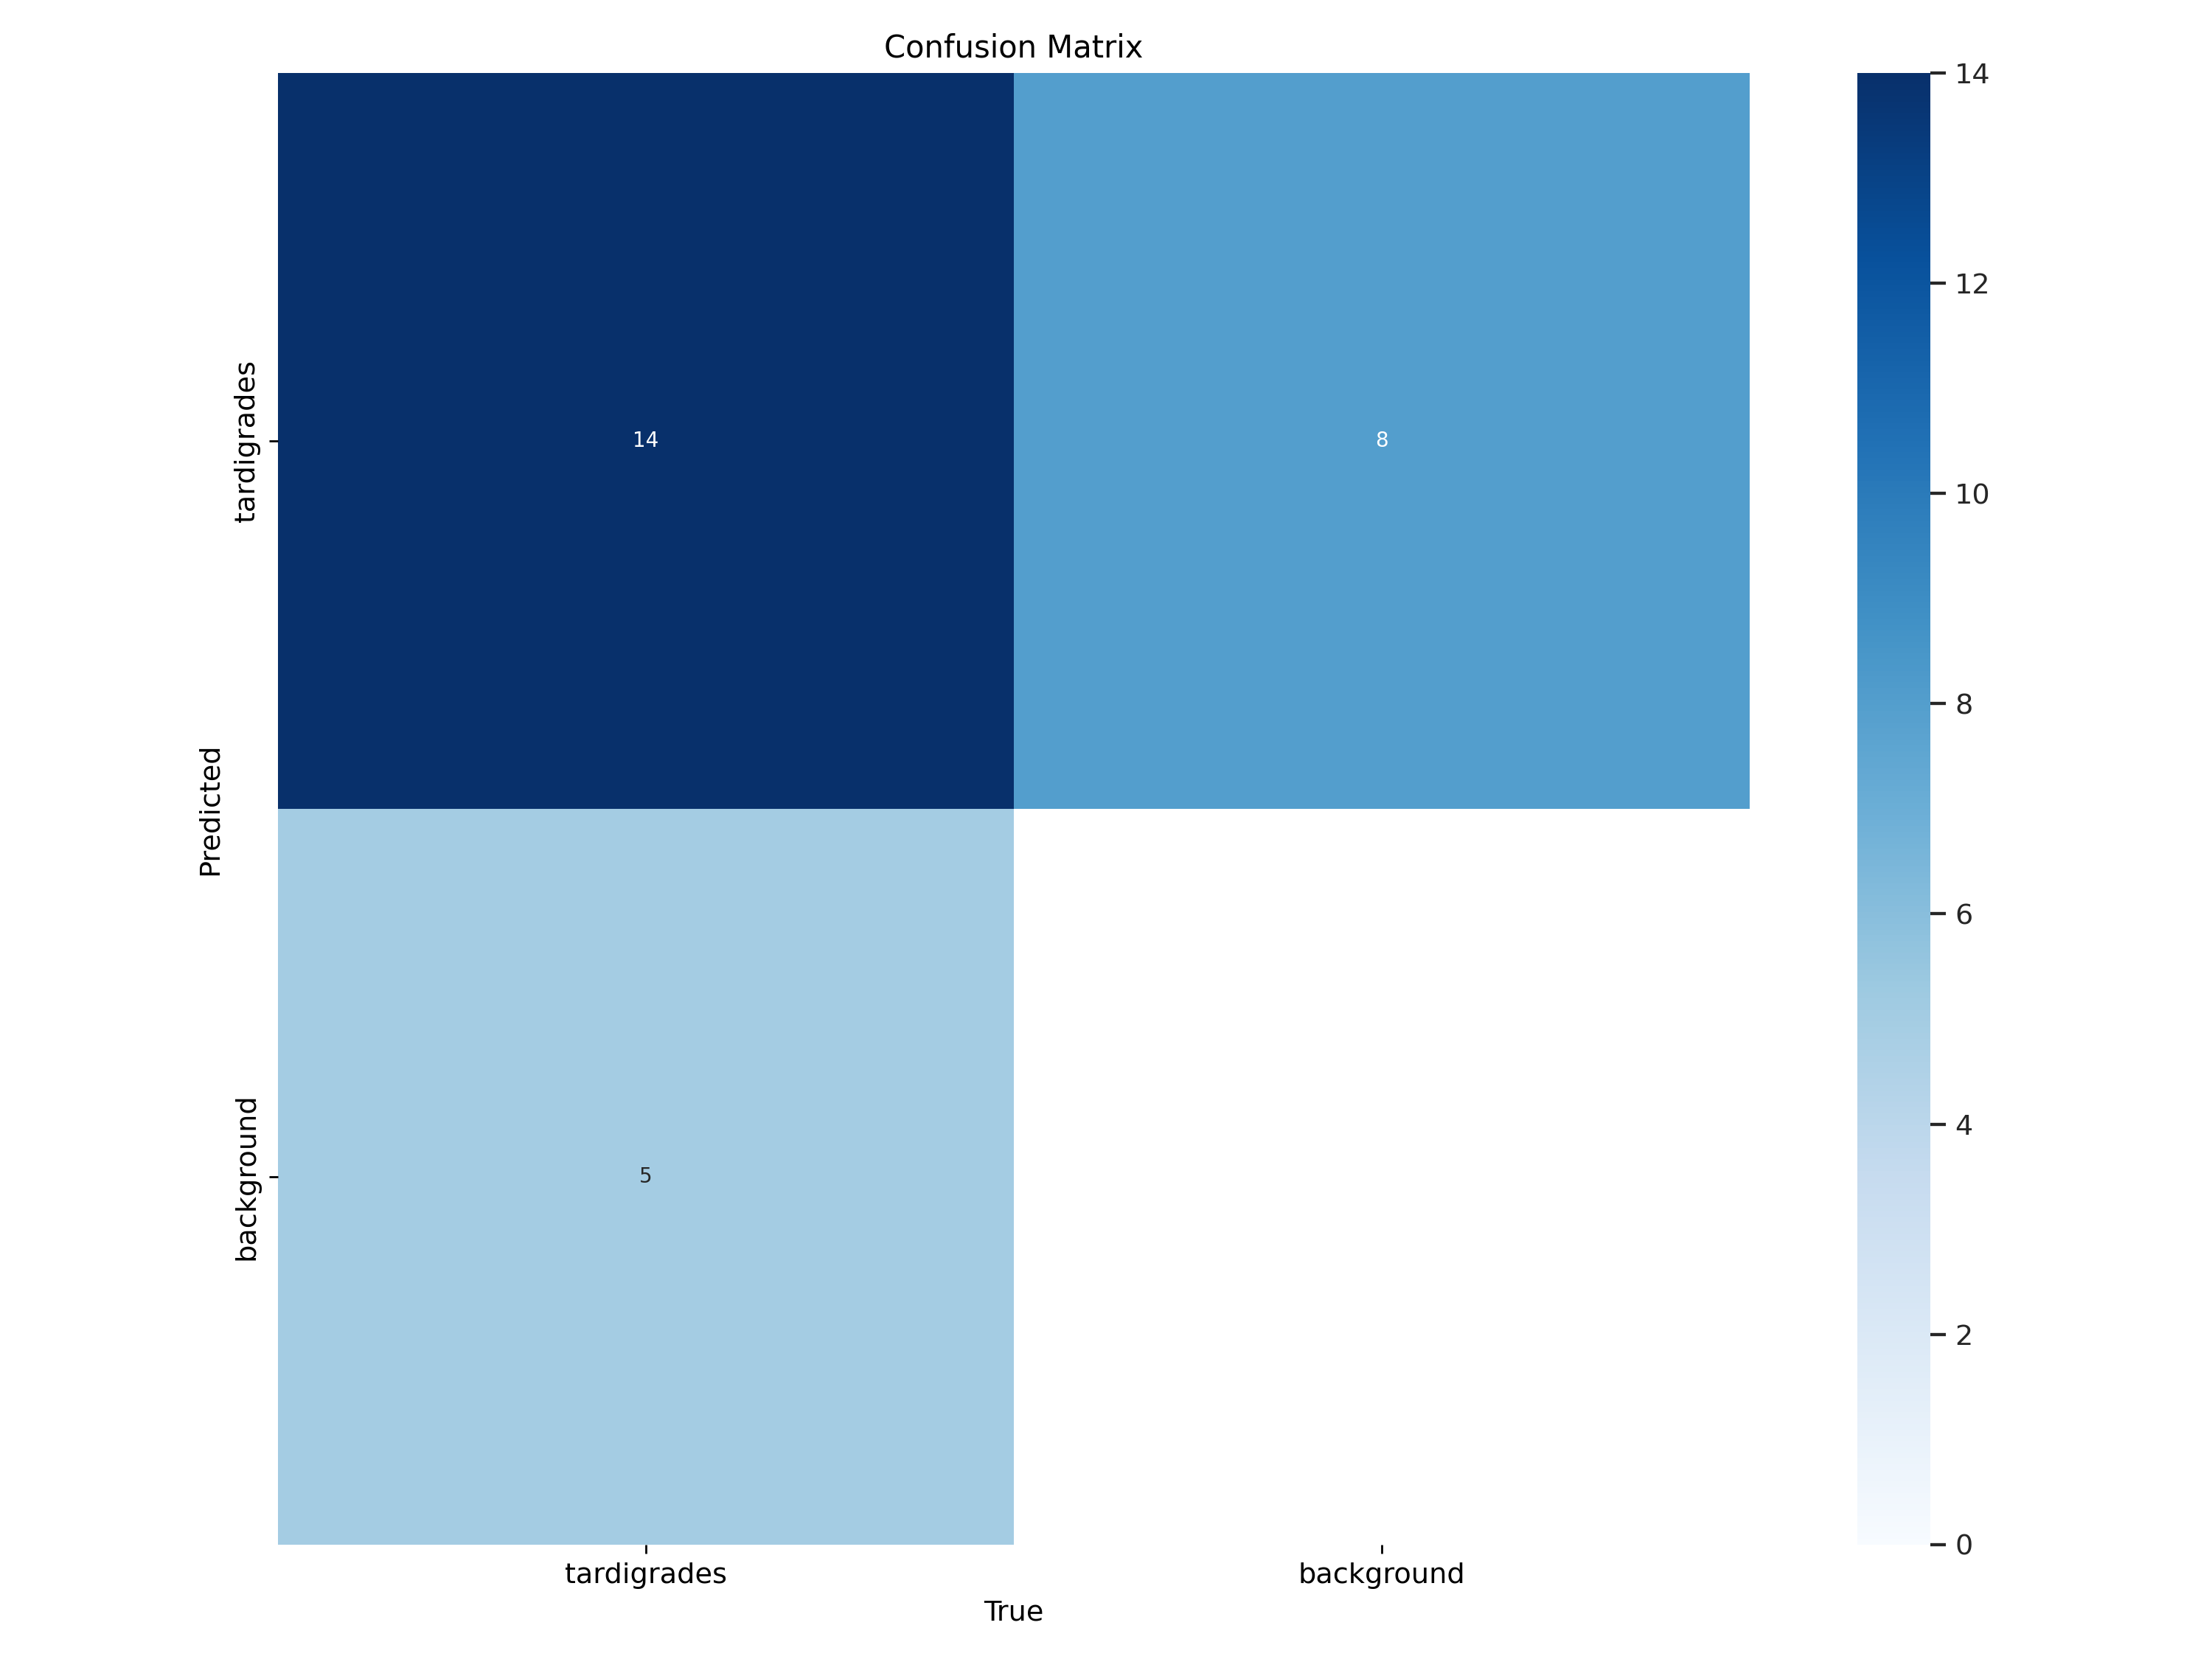

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

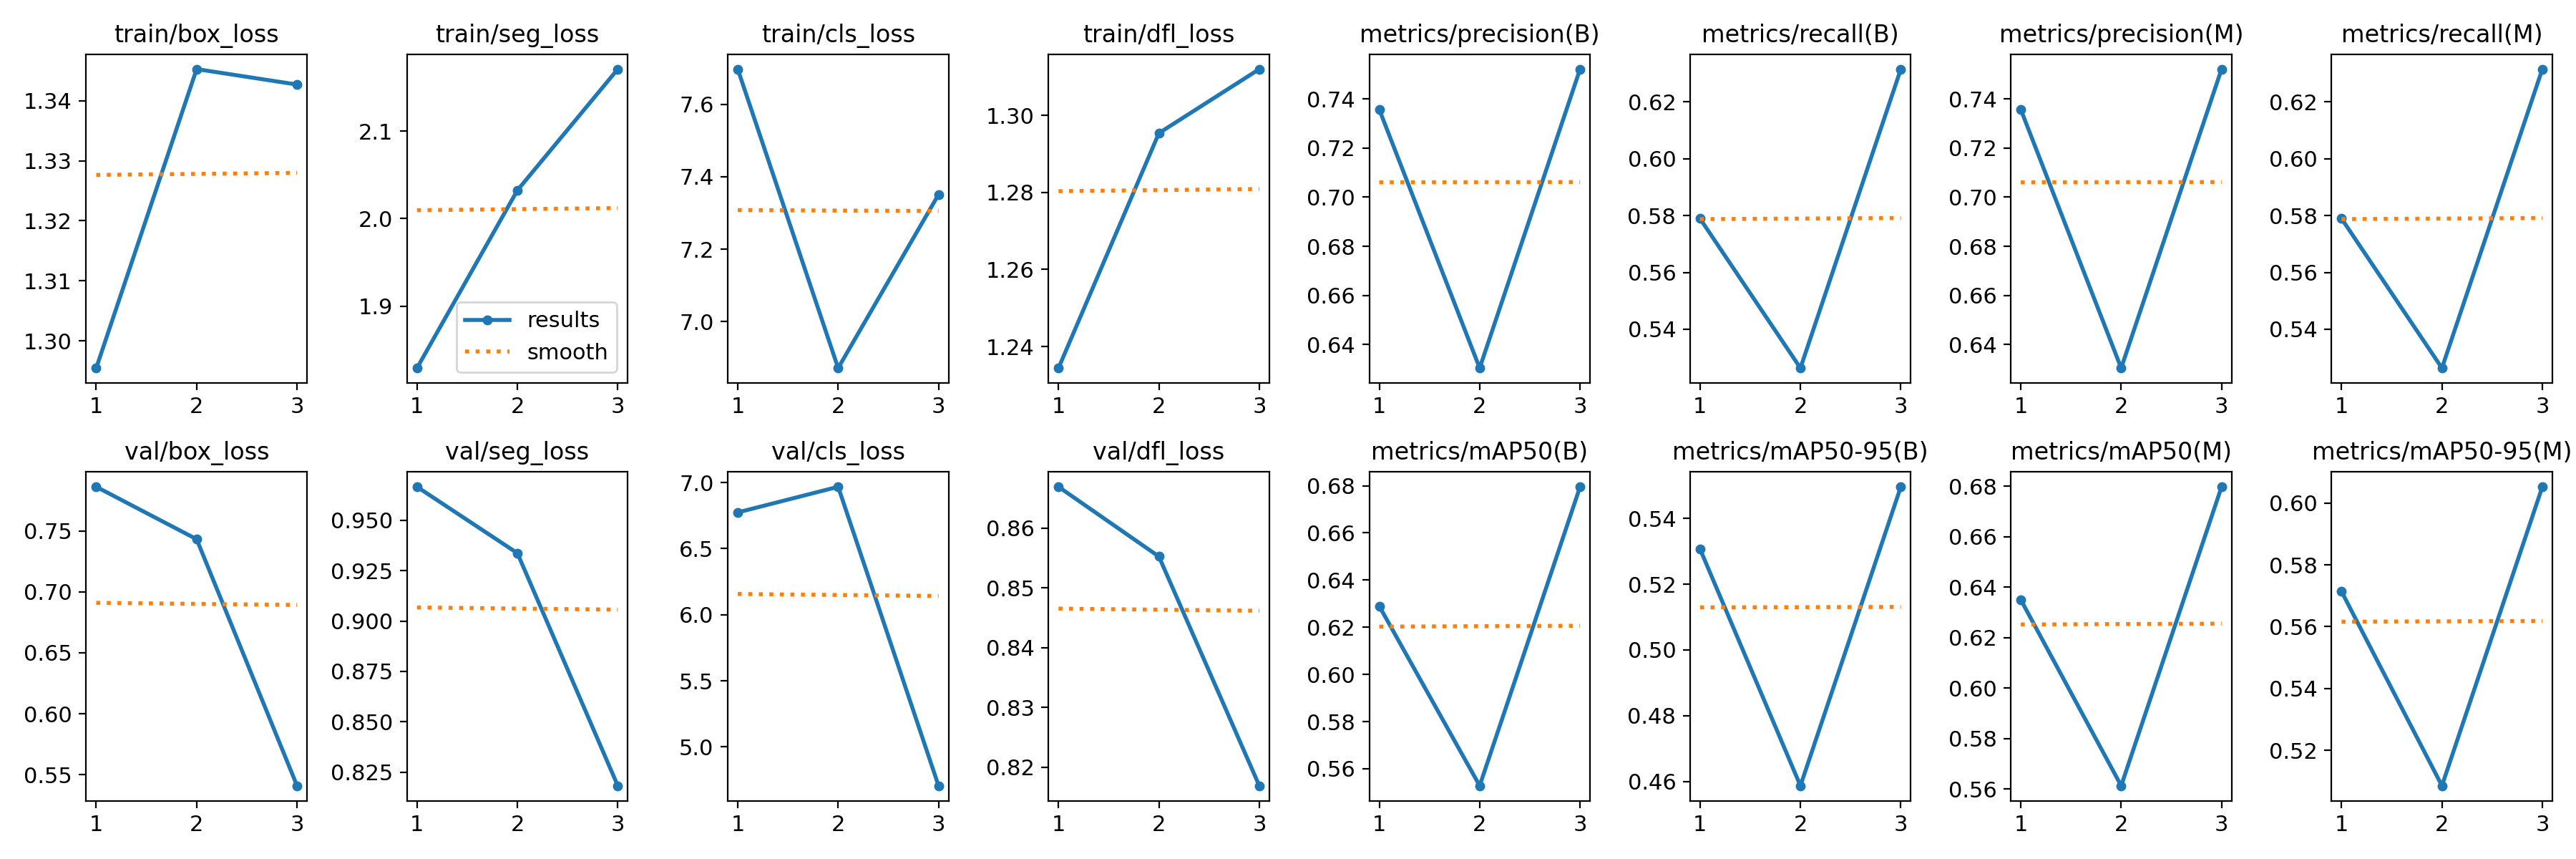

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

# Validate fine-tuned model (Training on tardigrades)

In [9]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={HOME}/tardigrades.v1i.yolov11/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.63it/s]
                   all         19         19      0.753      0.632      0.681      0.543      0.753      0.632      0.681      0.606
Speed: 0.5ms preprocess, 28.5ms inference, 0.0ms loss, 18.3ms postprocess per image
Results saved to runs/segment/val2
💡 Learn more at h

# Inference with custom model

In [10]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/tardigrades.v1i.yolov11/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/20 /content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11/test/images/frame_0018_jpg.rf.2633b4e7f58872ab9e19bfa868897b76.jpg: 640x640 1 tardigrades, 20.3ms
image 2/20 /content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11/test/images/frame_0022_jpg.rf.2caf9f8d2e1168d9586d5b643e264a55.jpg: 640x640 (no detections), 20.2ms
image 3/20 /content/drive/MyDrive/71254_2025/02_Assignment_Submission/Anna_Shilling/11/tardigrades.v1i.yolov11/test/images/frame_0027_jpg.rf.39b64568ae0be3813439a1bd4ed33cb5.jpg: 640x640 (no detections), 20.4ms
image 4/20 /content/drive/MyDrive/71254_2025/02_Assignme

# Visualization of test results

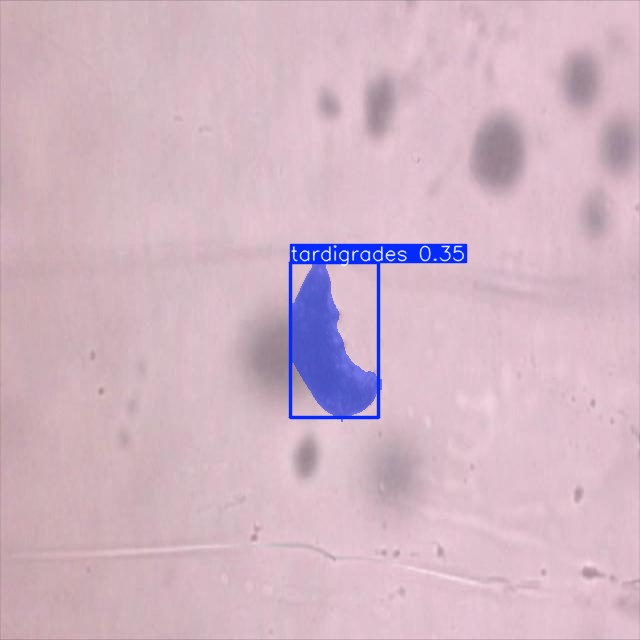

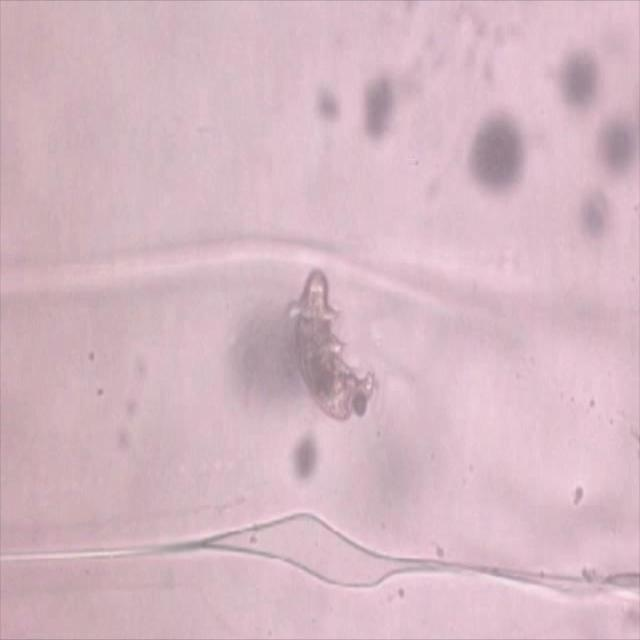

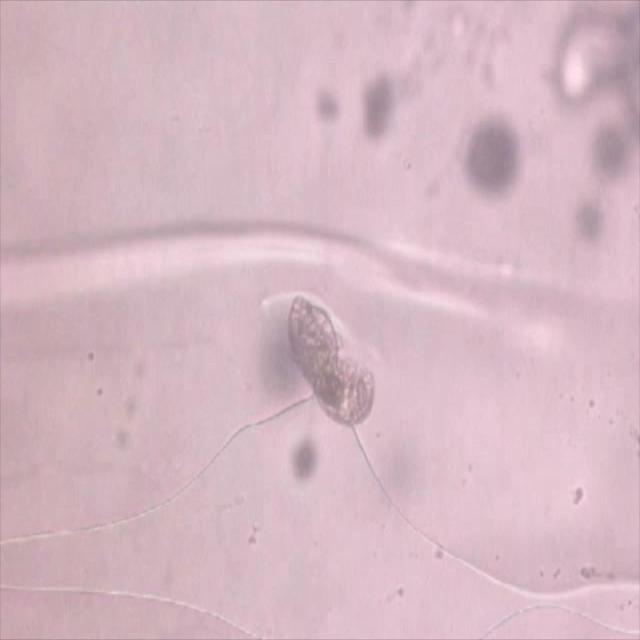

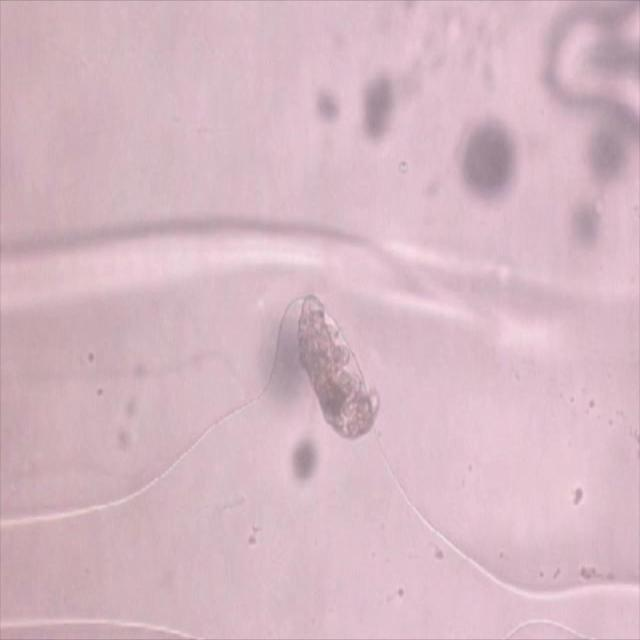

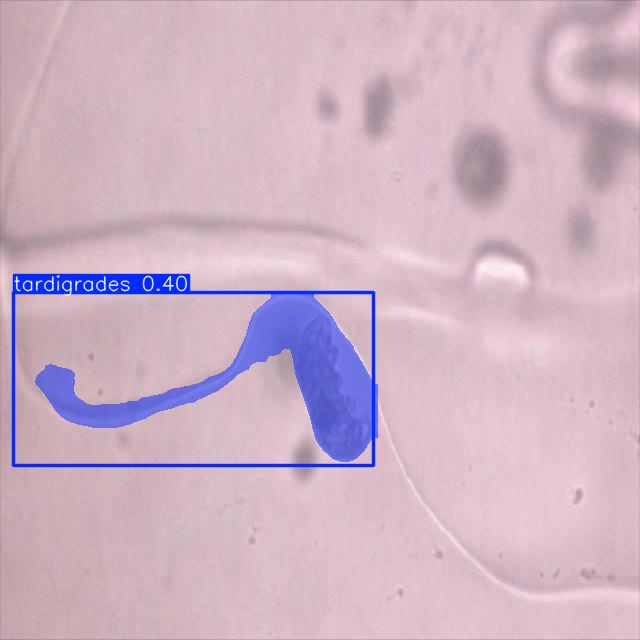

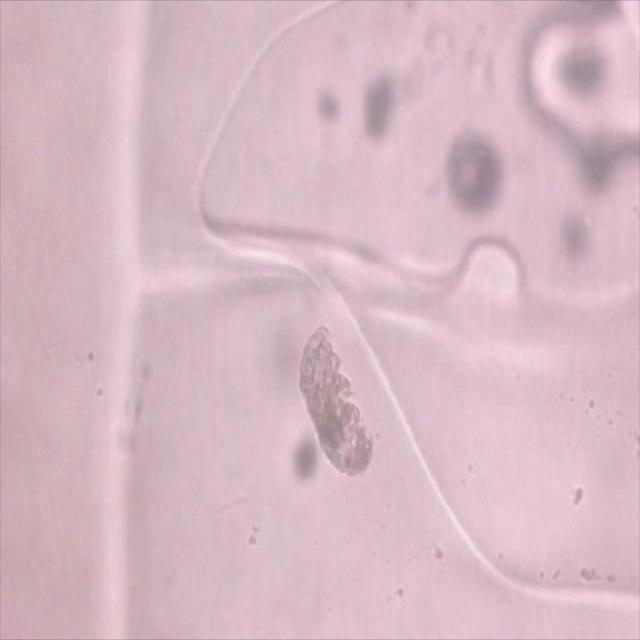

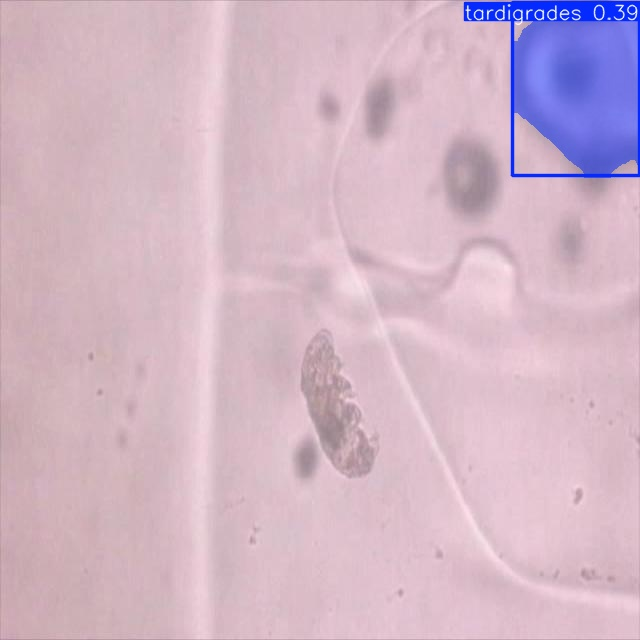

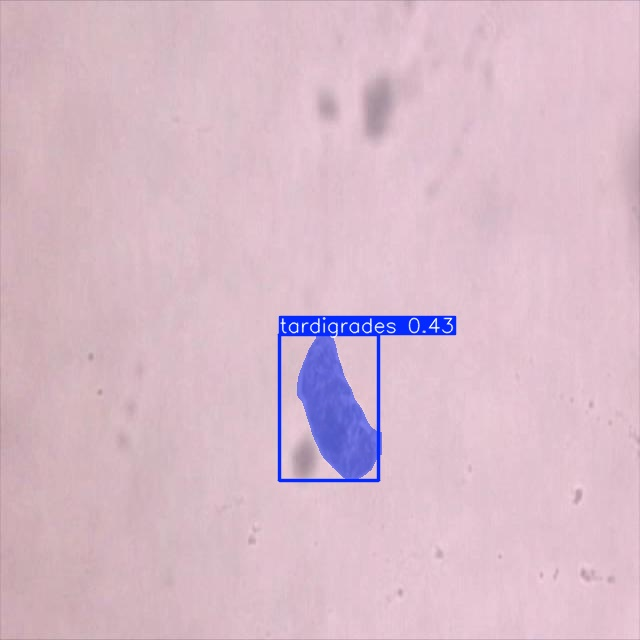

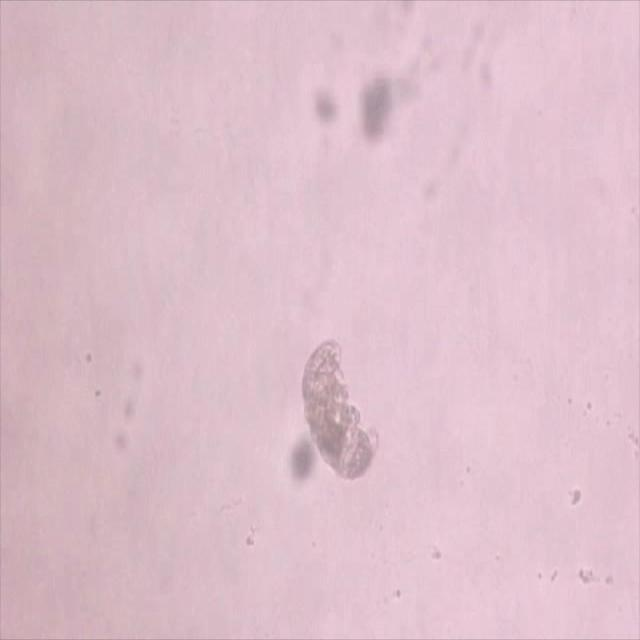

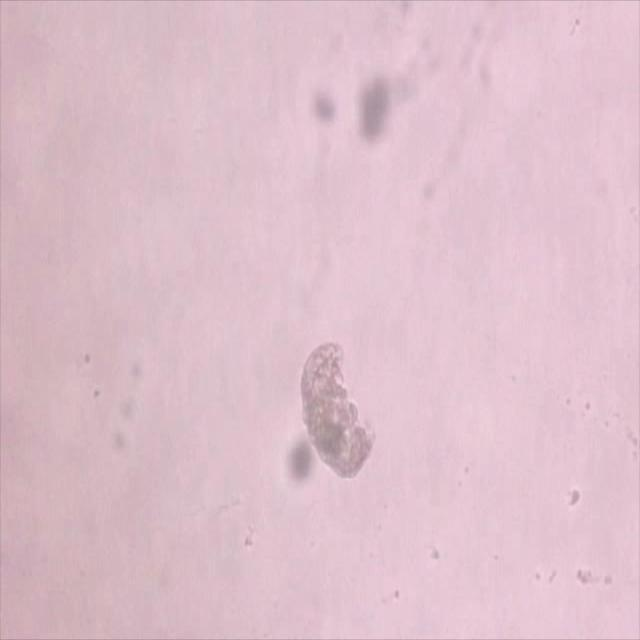

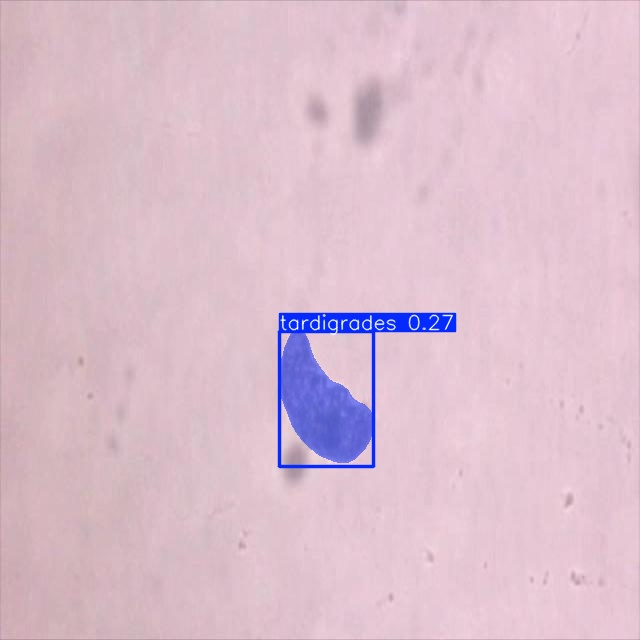

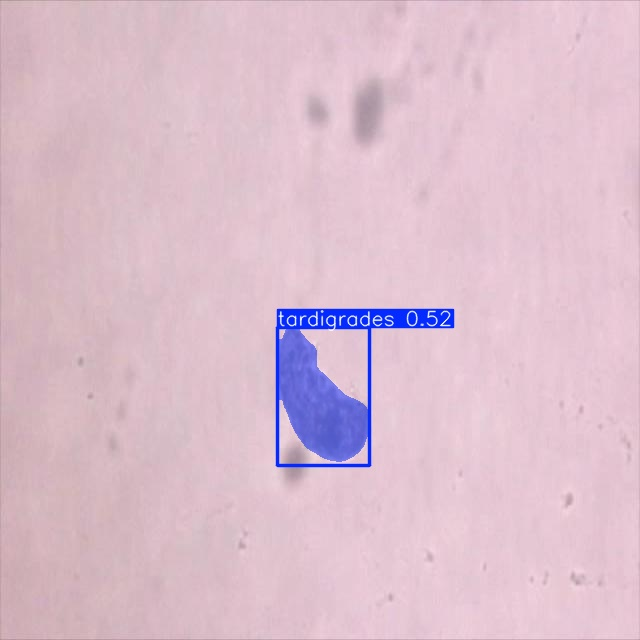

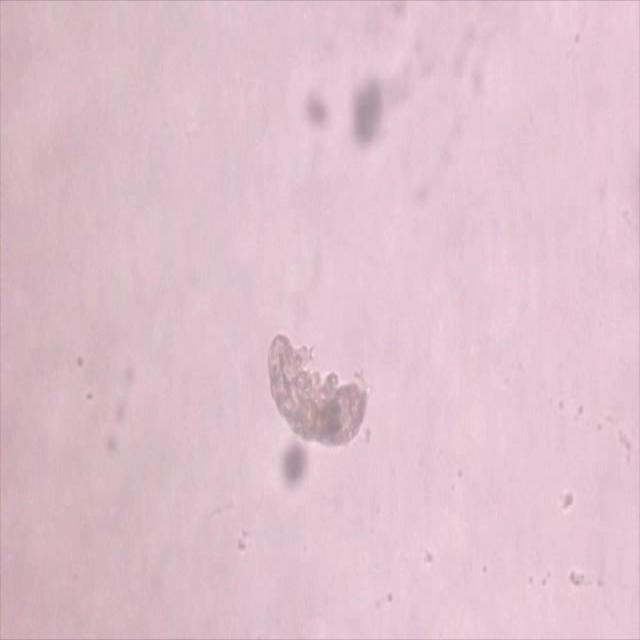

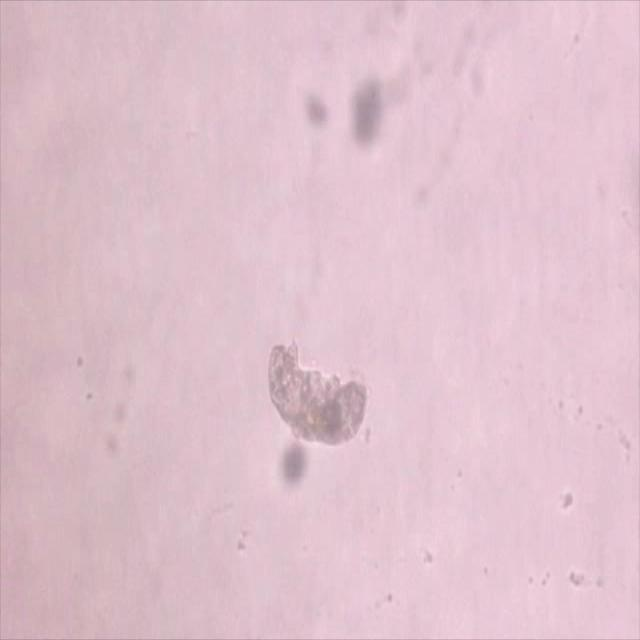

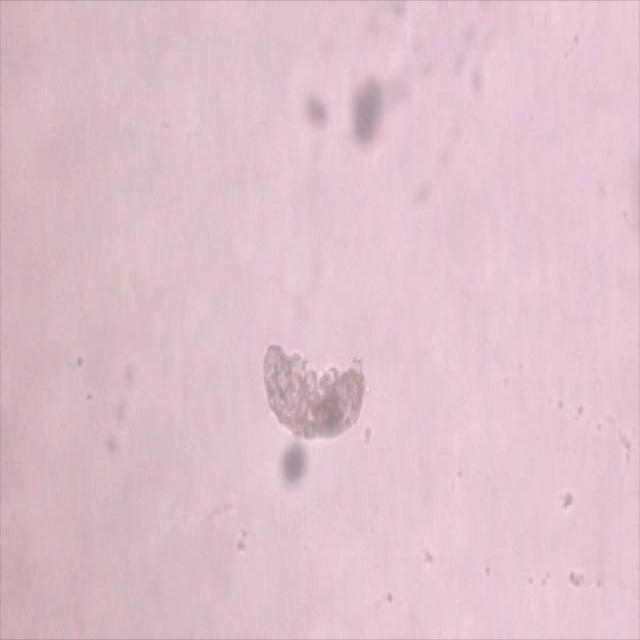

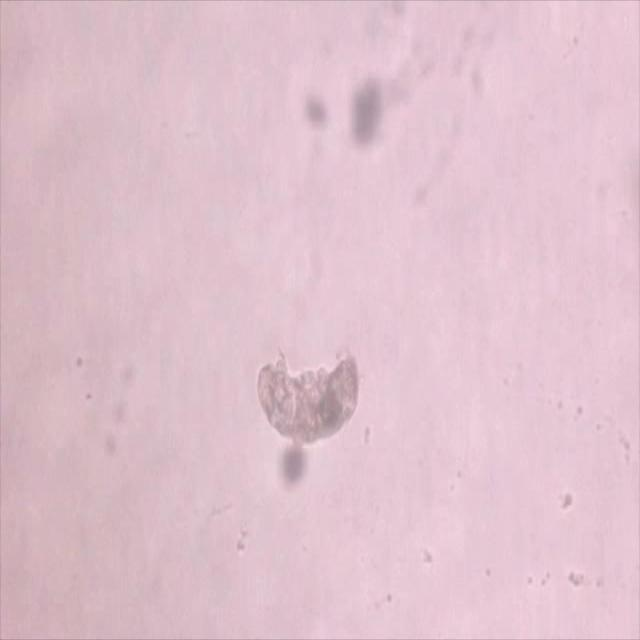

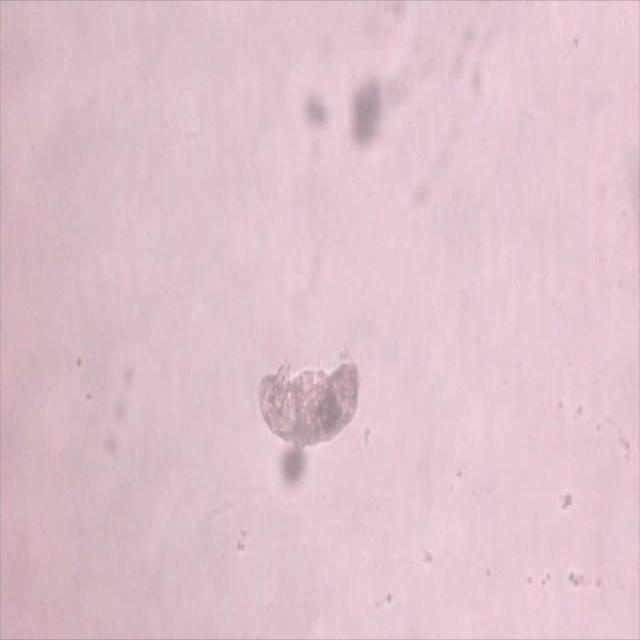

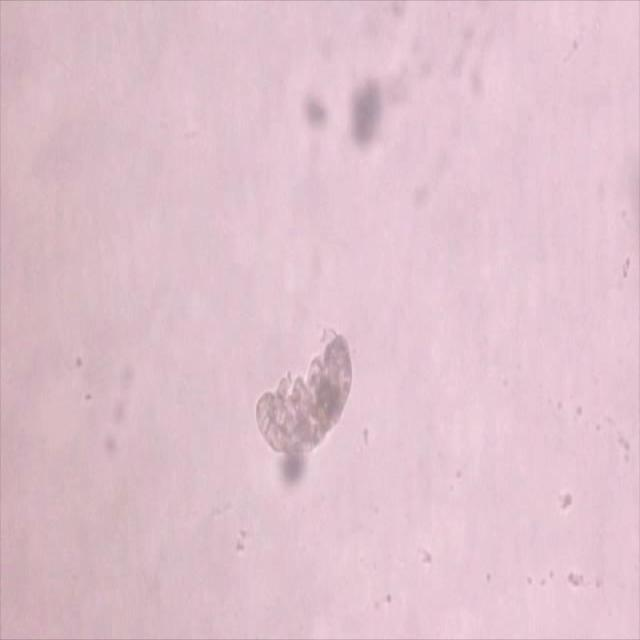

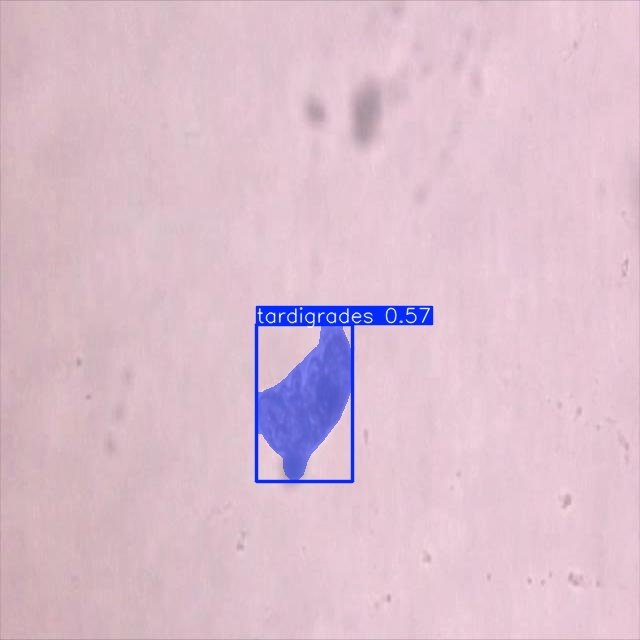

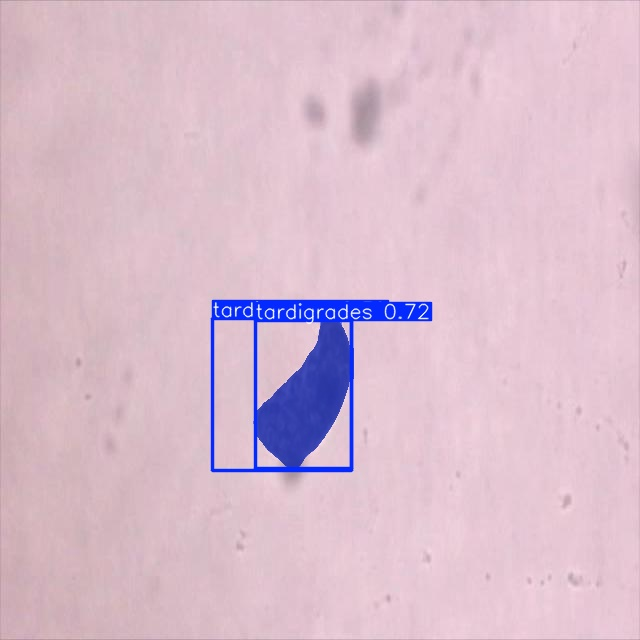

In [11]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:]:
    display(IPyImage(filename=img, width=200))
    print("\n")

# Running the model on unknown images

In [12]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
image = Image.open(f"{HOME}/tardigrades.v1i.yolov11/test/images/frame_0018_jpg.rf.2633b4e7f58872ab9e19bfa868897b76.jpg")
result = model.predict(image, conf=0.25)[0]


0: 640x640 1 tardigrades, 21.7ms
Speed: 4.6ms preprocess, 21.7ms inference, 204.6ms postprocess per image at shape (1, 3, 640, 640)


# Display segmentations

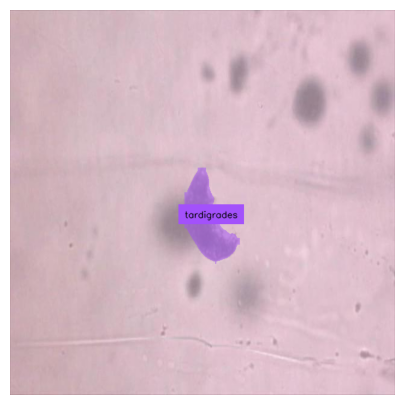

In [13]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

# Rename classes
name_dictionary = {
    "Tardigrade": "Tardigrade",
}
detections.data["class_name"] = [name_dictionary.get(class_name, class_name) for class_name in detections.data["class_name"]]

mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
mask_annotator.annotate(annotated_image, detections=detections)
label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(5, 5))

# Upload the new weights to Roboflow

In [14]:
save_path = os.path.join(HOME, "best.pt")

import torch

torch.save(model.state_dict(), save_path)
